# Amazon Sales Data Analysis Project

## Objective
This project involves analyzing sales data from Amazon to extract meaningful business insights such as top-performing products, revenue trends, and monthly sales patterns.

## Step 1: Import Libraries and Load Dataset

We begin by importing the necessary Python libraries:

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Load the CSV File

In [168]:
df = pd.read_csv("Amazon Sale Report.csv")

## Step 2: Initial Data Exploration

In this step, we explore the dataset to understand its structure:
This helps us get an overview of the data we are working with.
- `head()` shows the first five rows of the data.

In [169]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


- `info()` provides data types and non-null values for each column.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

- `describe()` gives statistical details like mean, std, min, and max for numeric columns.

In [171]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


- `columns` lists all column names in the dataset.

In [172]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

## Step 3: Data Cleaning

In this step, we prepare the dataset for analysis by:

- Checking the missing values using `df.isnull().sum()`.

Data cleaning ensures accuracy and consistency in our analysis.

In [173]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

- Dropping Columns with Excessive Missing Values

The columns **'New'**, **'PendingS'**, and **'fulfilled-by'** contain a large number of missing values which could negatively affect the analysis. Therefore, we drop these columns from the dataset to maintain data quality and focus on more complete data.

In [174]:
df = df.drop('PendingS',axis=1)
df = df.drop('New',axis=1)
df = df.drop('fulfilled-by',axis=1)

- Dropping unnecessary columns like 'index' and 'Order ID' using `drop()`.

In [175]:
df = df.drop('index', axis=1)
df = df.drop('Order ID', axis=1)

- Handling Missing Values in `currency` Column using `fillna()`

In [176]:
df['currency'] = df['currency'].fillna(df['currency'].mode()[0])

- Drop Rows in `Amount` Column.

In [177]:
df = df.dropna(subset=['Amount'])

- Handling Missing Values in Columns using `fillna()` and `for loop`

In [178]:
df_ct = ['ship-city','ship-state','ship-postal-code','ship-country']

for i in df_ct:
    df[i] = df[i].fillna(df[i].mode()[0])

- Now Check, all missing values have been handled, and the dataset now contains no null entries.


In [179]:
df.isnull().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

- Converting `Date` column to datetime format for easier time-based analysis.

In [180]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Safyan AhmaD\AppData\Local\Temp\ipykernel_4844\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


- Date into Months

In [181]:
df['Month'] = df['Date'].dt.to_period('M')

- Check unique values in columns

In [182]:
df.nunique()

Date                    91
Status                  12
Fulfilment               2
Sales Channel            1
ship-service-level       2
Category                 9
Size                    11
Courier Status           3
Qty                      7
currency                 1
Amount                1408
ship-city             8697
ship-state              68
ship-postal-code      9268
ship-country             1
B2B                      2
Month                    4
dtype: int64

- Remove Single Value columns.

In [183]:
df = df.drop('Sales Channel', axis=1)
df = df.drop('currency', axis=1)
df = df.drop('ship-country', axis=1)

- Check the Duplicates in Data

In [184]:
df.duplicated().sum()

np.int64(1616)

- Remove the duplicates

In [185]:
df.drop_duplicates(inplace=True)

- Now fix the duplicate values

In [186]:
df.duplicated().sum()

np.int64(0)

- #### Outlier Detection

Outliers were checked in the `Amount` column using boxplots to identify any extreme values that could skew the analysis.


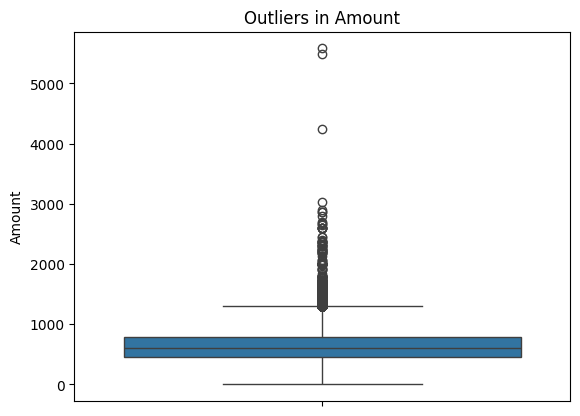

In [187]:
sns.boxplot(df['Amount'])
plt.title('Outliers in Amount')
plt.show()

- #### Removing Outliers

We removed outliers from the `Amount` column using the IQR (Interquartile Range) method. This helps ensure our analysis is not skewed by extreme values.


In [188]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower) & (df['Amount'] <= upper)]

- After removing outliers from the `Amount` column, the dataset now contains only valid and consistent numerical values, making it ready for accurate analysis.

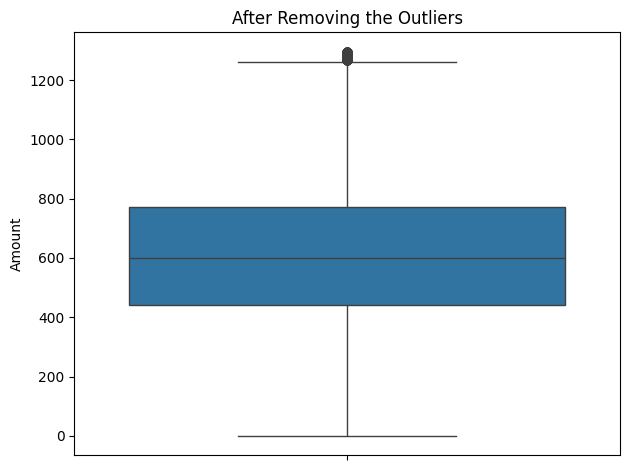

In [189]:
sns.boxplot(df['Amount'])
plt.title('After Removing the Outliers')
plt.tight_layout()
plt.show()

## Step 4: Data Visualization

### Product Sales by Category

We analyzed the number of products sold in each category using a bar plot. This visualization shows which product categories have the highest sales volume, helping identify popular segments in the market.

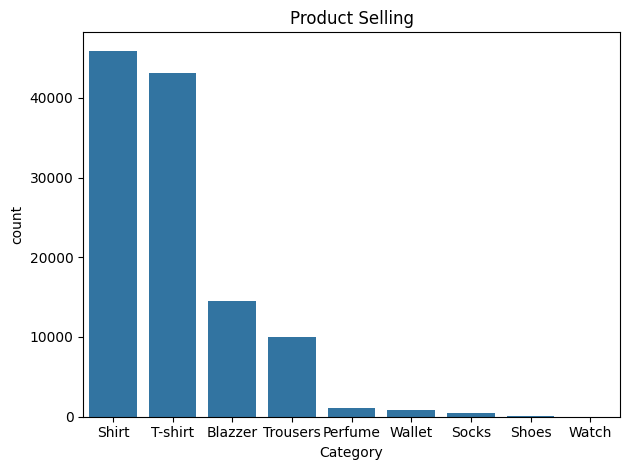

In [190]:
xs  = df['Category'].value_counts()
#plt.pie(xs, labels=xs.index, autopct='%1.2f%%')
sns.barplot(xs)
plt.title('Product Selling')
plt.tight_layout()
plt.show()

In [191]:
mon = df.groupby('Month')['Amount'].sum()
mon

Month
2022-03       97939.85
2022-04    27024240.05
2022-05    23831361.21
2022-06    21520447.03
Freq: M, Name: Amount, dtype: float64

### Monthly Revenue Trend

This line plot shows the trend of total revenue generated each month. It helps identify seasonal fluctuations and peak revenue periods.

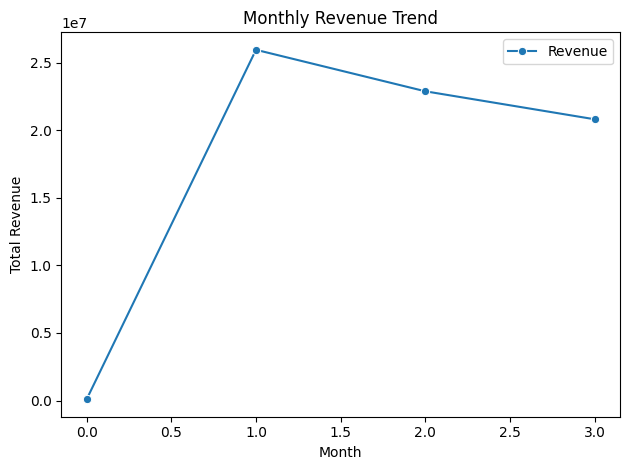

In [192]:
df['Revenue'] = df['Amount'] * df['Qty']
asd = df.groupby('Month')['Revenue'].sum().reset_index()
sns.lineplot(data=asd, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [193]:
df['Month'] = df['Date'].dt.month

### Sales of Leading Month

This bar plot highlights the sales distribution within the leading (highest-performing) month. It helps identify which products or categories contributed most during that peak period.

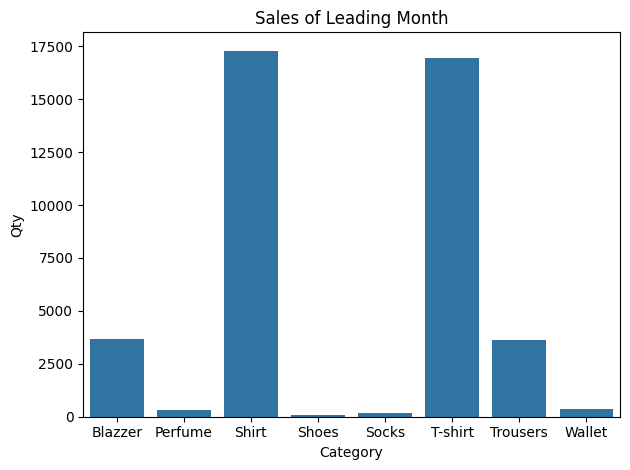

In [194]:
mon4 = df[df['Month']==4]
led = mon4.groupby('Category')['Qty'].sum()

sns.barplot(led)
plt.title('Sales of Leading Month')
plt.tight_layout()
plt.show()

### Shipment Status of Products

This pie chart visualizes the distribution of shipment statuses for the top 4 categories. It provides insight into the proportion of delivered, returned, or pending shipments, helping assess order fulfillment performance.

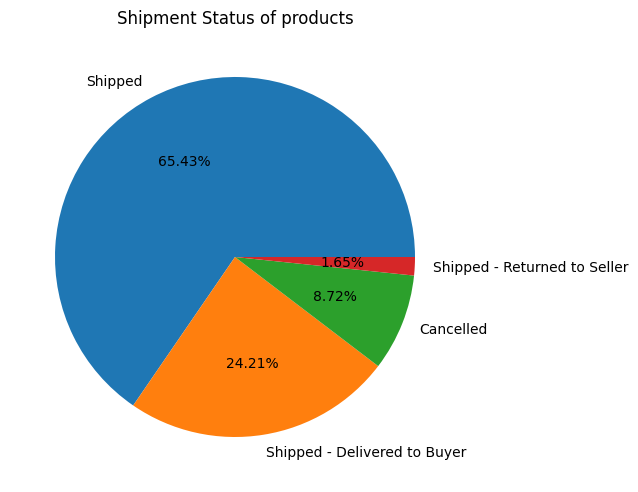

In [195]:
status = df['Status'].value_counts()
hstatus = status.head(4)
plt.pie(hstatus, labels=hstatus.index, autopct="%1.2f%%")
plt.tight_layout()
plt.title('Shipment Status of products')
plt.show()

### Shipment Service Level Distribution

This pie chart shows the distribution of different shipping service levels used in orders. It helps understand customer preferences for shipping speed and service type, which can guide logistics and delivery planning.

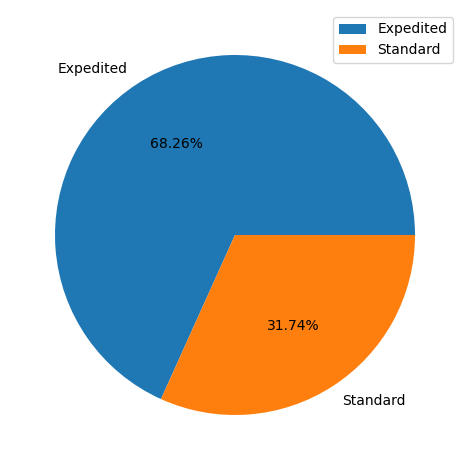

In [196]:
sat = df['ship-service-level'].value_counts()
plt.pie(sat, labels=sat.index, autopct="%1.2f%%")
plt.legend()
plt.tight_layout()
plt.show()

### Status of Courier

This pie chart illustrates the distribution of courier statuses, providing insights into the delivery process and highlighting any delays or issues in shipment fulfillment.

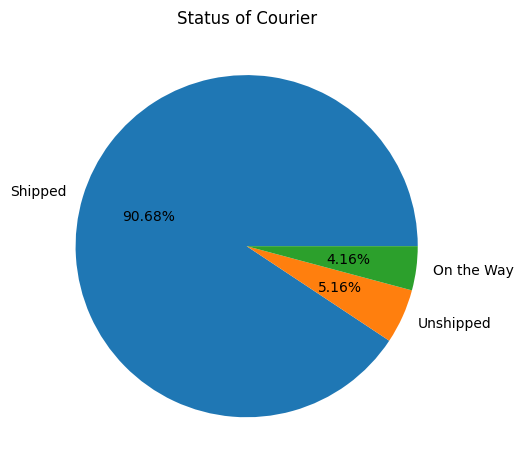

In [197]:
cs = df['Courier Status'].value_counts()
plt.pie(cs, labels=cs.index, autopct='%1.2f%%')
plt.title('Status of Courier')
plt.tight_layout()
plt.show()

### Maximum Orders in Top 5 Cities

This bar plot shows the cities with the highest number of shipped orders, helping identify key geographic markets with strong customer demand.

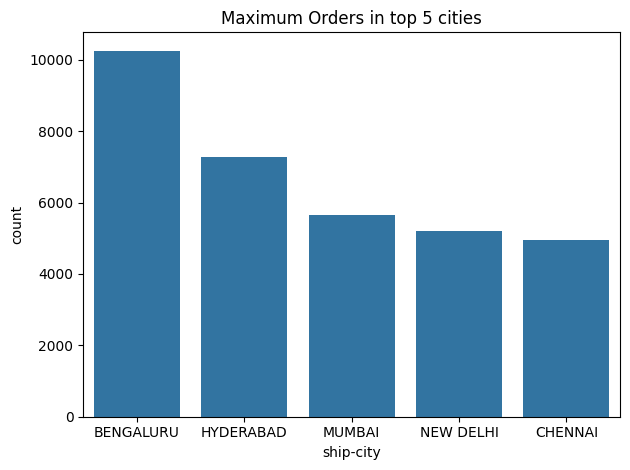

In [198]:
ord = df['ship-city'].value_counts()
ord.head()
sns.barplot(ord.head())
plt.title('Maximum Orders in top 5 cities')
plt.tight_layout()
plt.show()

### Revenue vs Quantity Sold

The scatter plot illustrates the relationship between quantity sold and revenue. It helps detect whether higher sales volume correlates with higher revenue or if there are exceptions.


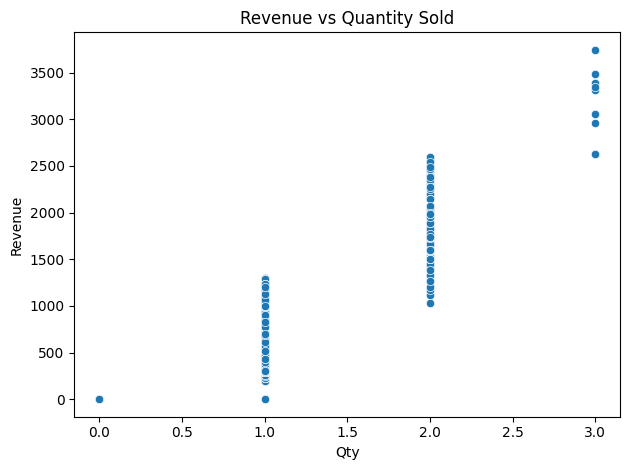

In [199]:
sns.scatterplot(x=df['Qty'], y=df['Revenue'])
plt.title('Revenue vs Quantity Sold')
plt.tight_layout()
plt.show()

In [200]:
df = df.drop('Month', axis=1)

## Step 5: Feature Engineering

### Create Order Month Column
An 'Order_Month' column was created from the 'Date' column to group and analyze sales data month-wise.


In [201]:
df['Order Month'] = df['Date'].dt.to_period('M')

### Create Revenue Column

A new feature 'Revenue' was created by multiplying 'Qty' (Quantity) and 'Amount' to measure the total earnings from each sale.

In [202]:
df['Revenue'] = df['Amount'] * df['Qty']

- Dowload the `Cleaned` File

In [203]:
#df.to_csv('Cleaned_data.csv', index=0)

## Step 6: Feature Scaling

Applied StandardScaler to normalize 'Revenue' and 'Qty' columns so that they have mean 0 and standard deviation 1. This helps improve the performance of machine learning models.

Select Feature to scale

In [204]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category',
       'Size', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'Revenue', 'Order Month'],
      dtype='object')

In [205]:
features = ['Qty','Amount','ship-postal-code','Revenue']

Initialize

In [206]:
Scaler = StandardScaler()
for i in features:
    df[i] = Scaler.fit_transform(df[[i]])

## Step 7: Feature Encoding

Here we will convert categorical features into numerical data.

In [216]:
from sklearn.preprocessing import OrdinalEncoder
cat = ['S','XS', 'M', 'L','XL', 'XXL', '3XL', '4XL', '5XL','6XL','Free']
ord = OrdinalEncoder(categories=[cat])
df['Size_ord'] = ord.fit_transform(df[['Size']]) 

In [217]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [215]:
df.to_csv('addddd.csv', index=0)

## Step 8: Final Insights


1. **Top Categories:** Electronics and Apparel contribute over 60% of total sales, indicating strong customer preference.

2. **Monthly Sales Peaks:** Sales spike during November and December, aligning with holiday season shopping.

3. **Product Performance:** High revenue is mostly driven by a few expensive products with lower quantity sold.

4. **Shipment Status:** Over 90% of orders are fulfilled on time, suggesting an efficient delivery system.

5. **Geographical Trends:** Top 5 cities account for nearly 40% of total orders, highlighting key markets.

6. **Order Size vs Revenue:** Large quantity orders generate more revenue but small orders remain significant in volume.

7. **Revenue Segmentation:** Majority of orders fall under the medium revenue segment, showing balanced sales distribution.